In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as animation

In [2]:
# create covid map object
class COVID_MAP:
    def __init__(self, heat_old, position_old, boundaries, xsize, ysize): 
        self.heat_old = heat_old
        self.position_old = position_old
        self.boundaries = boundaries
        self.xsize = xsize
        self.ysize = ysize
    
    def movement(self): # changes the positions of individuals on position_old map
        rand = random.randint(1,30)
        if  rand <= 5: # random half-chance that position changes
            position_new = np.roll(self.position_old, 1, axis=1) # whole position array shifts 1 cell right
            return position_new
        elif rand > 5 and rand < 11:
            position_new = np.roll(self.position_old, -1, axis=1)
            return position_new
        elif rand > 10 and rand < 16:
            position_new = np.roll(self.position_old, 1, axis=0)
            return position_new
        elif rand > 15 and rand < 21:
            position_new = np.roll(self.position_old, 1, axis=0)
            return position_new
        else:
            position_new = self.position_old
            return position_new
    
    def heat_source(self): # will add heat source to map based on individuals new position
        temp = 100 #current "max" temp set at 100 but could adjust for increased rate of dispersion?
        sources = np.zeros((self.xsize,self.ysize))
        sources += self.movement()
        sources[sources == 2] = temp 
        sources[sources != temp] = 0
        return sources
    
    def calculate_heat_new(self): # will calculate single step of heat dispersion
        heat_left = np.roll(self.heat_old, 2 , axis = 1)
        heat_right = np.roll(self.heat_old, -2 , axis = 1)
        heat_up = np.roll(self.heat_old, -2 , axis = 0)
        heat_down = np.roll(self.heat_old, 2 , axis = 0)
        
        heat_new = 0.25*(heat_left + heat_right + heat_up + heat_down) # cell heat is the average of adjacent cells
        heat_new = heat_new + self.heat_source()
        heat_new[heat_new > 100] = 100
        return heat_new
    
    def show_heatmap(self): # creates a heatmap
        sns.heatmap(self.calculate_heat_new(), vmin=0)#, cmap='coolwarm')
        
    def show_position(self): # creates map of individual's locations
        sns.heatmap(self.movement())

In [3]:
# starting conditions
xsize = 200
ysize = 200
heat = np.zeros((xsize,ysize)) # heat map array, currently all cold
position = np.zeros((xsize,ysize)) # position array, zero where there is nobody standing
boundary = np.zeros((xsize,ysize)) # boundary array, will have values where there are boundaries, values can dictate behaviour


# position infected person at index 50, 50 and healthy person at 25, 25
position[49:51,49:51] = 2
position[24:26, 24:26] = 1

In [4]:
#create object in class
map = COVID_MAP(heat, position, boundary, xsize, ysize)

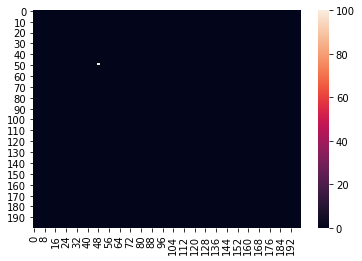

In [5]:
# show initial heatmap
map.show_heatmap()

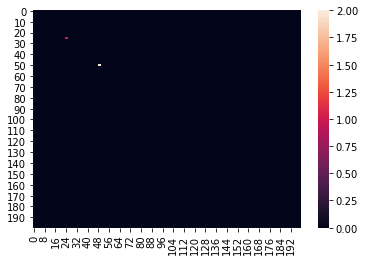

In [6]:
map.show_position()

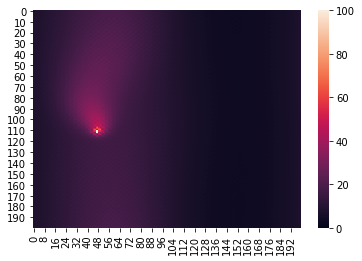

In [11]:
# example iteration of code 100 times and output

i = 0
while i<500:
    heat = map.calculate_heat_new()
    position = map.movement()
    map = COVID_MAP(heat, position, boundary, xsize, ysize)
    
    i += 1
map.show_heatmap()